In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [163]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)

In [164]:
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

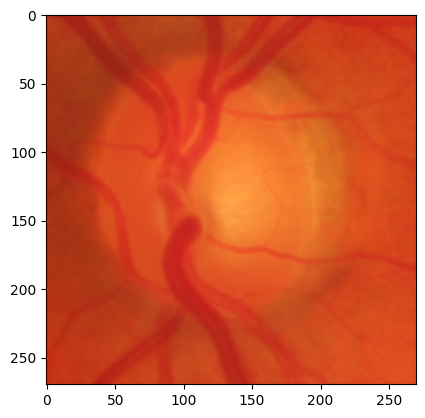

In [165]:
plt.imshow(roi)

In [166]:
red = roi[:,:,0]

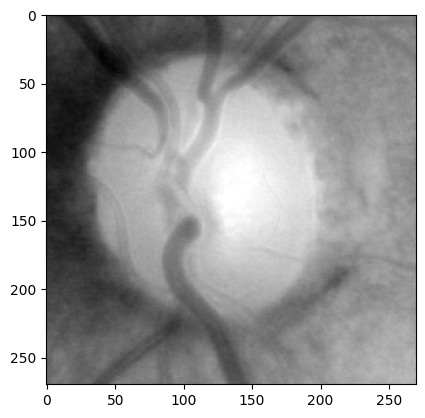

In [167]:
plt.imshow(red, 'gray')

In [168]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [182]:
adj_gm = adjust_gamma(red.copy(), 5)

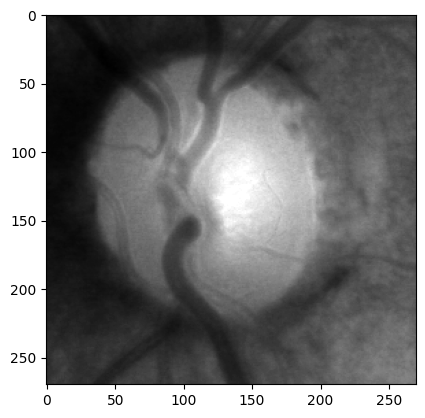

In [183]:
plt.imshow(adj_gm, 'gray')

In [184]:
blr_gm = cv2.GaussianBlur(adj_gm.copy(), (19,19), 0)

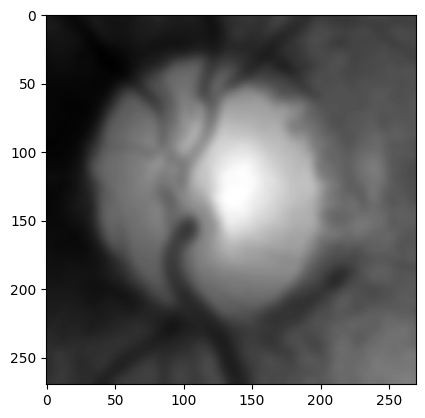

In [185]:
plt.imshow(blr_gm, 'gray')

In [186]:
dilate = cv2.dilate(blr_gm.copy(), kernel=np.ones((15,15), np.uint8))

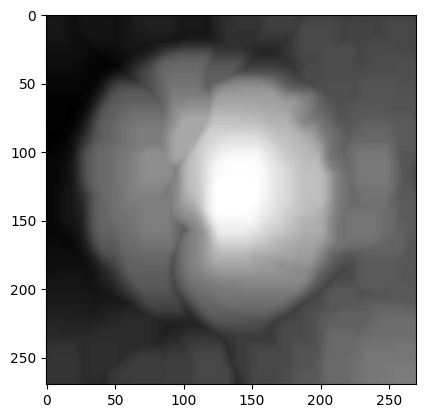

In [187]:
plt.imshow(dilate, 'gray')

In [188]:
erosion = cv2.erode(dilate.copy(), kernel=np.ones((10,10), np.uint8))

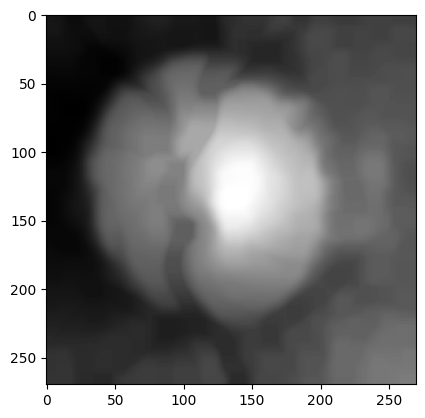

In [189]:
plt.imshow(erosion, cmap='gray')

In [190]:
ret4,th4 = cv2.threshold(erosion.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

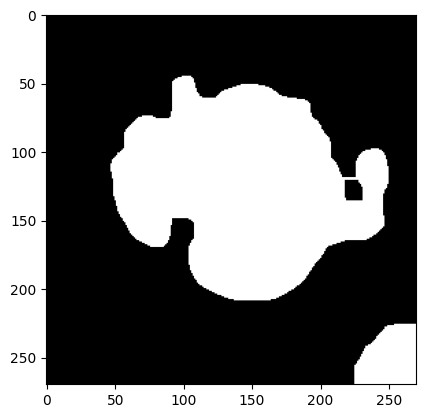

In [191]:
plt.imshow(th4, 'gray')

In [192]:
cont, hcy = cv2.findContours(th4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

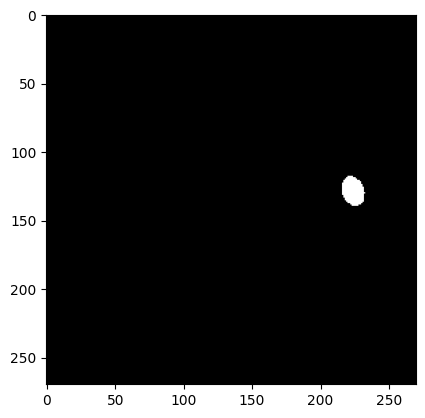

In [200]:
thhh = th4.copy()
roic = roi.copy()
for contour in cont:
    ellipse = cv2.fitEllipse(contour)
    od = np.zeros_like(thhh, dtype='uint8')
    cv2.ellipse(od, ellipse, (255, 255, 255), -1)
    cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(od, 'gray')

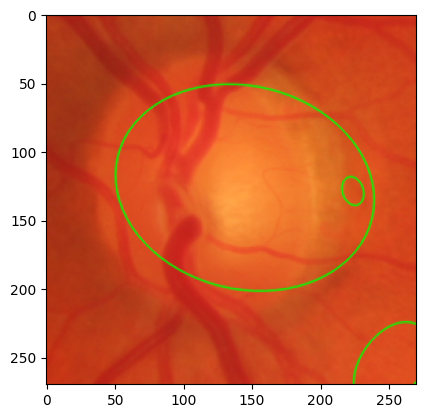

In [194]:
plt.imshow(roic)

# New